<a href="https://colab.research.google.com/github/kiarashgh98/Topic-modeling-/blob/main/2_opt_num_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Imports and Downloads 📢**

##### Import Packages

In [ ]:
!pip install gap-stat

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6949 sha256=569d9cd4434dc87db68351d8270ff5a265038a6e1511659ee81b8ba1ce3b14dd
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap-stat


In [ ]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.1 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 5.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import pandas as pd
import ast
from tqdm import tqdm, trange
from sentence_transformers import SentenceTransformer
import hdbscan
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import contingency_matrix
import numpy as np

# **Dataset 🗂️**

### Open CSV File

In [ ]:
# Using on_bad_lines (pandas 1.3.0 and above)
org_df = pd.read_csv('/content/drive/MyDrive/Kiarash/New Codes/data_after_preprocessing.csv', encoding='latin1', on_bad_lines='skip')
df = org_df

# **Identifying the Optimal Number of Topics 🧮**

In [ ]:
# Step 1: Prepare your data
documents = df['cleaned_text']
tokenized_documents = [doc.split() for doc in documents]

In [ ]:
# Step 2: Create a dictionary and corpus
dictionary = corpora.Dictionary(tokenized_documents)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

In [ ]:
# Step 3: Define a function to calculate coherence for a given number of topics
def calculate_coherence(dictionary, corpus, texts, num_topics, passes=20, iterations=100):
    # Build LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes, iterations=iterations)

    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()

    return coherence_score

In [ ]:
hubert_index_values = []
for k in range(2, max_topics + 1):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, passes=20, iterations=100)
    topics = lda_model.get_document_topics(corpus)
    labels = [sorted(topic, key=lambda x: x[1], reverse=True)[0][0] for topic in topics]

    # Create contingency matrix
    contingency = contingency_matrix(labels, labels)

    # Calculate Hubert index
    n = np.sum(contingency)
    agree_pairs = np.sum(np.multiply(contingency, contingency)) - n
    total_pairs = n * (n - 1) / 2
    hubert_index = agree_pairs / total_pairs

    hubert_index_values.append(hubert_index)

    print(k, hubert_index)

2 1.0632755356774026
3 0.7051324616371933
4 0.5349424106071785
5 0.4803981342947912
6 0.4058037342830766
7 0.3983240274768431
8 0.3222905121141793
9 0.3040346663301605
10 0.2684647365291543
11 0.2750815956943042
12 0.21120100972003084
13 0.24027987818022037
14 0.21154354490429356
15 0.18939565218864277
16 0.20262035496153422
17 0.19165953705000713
18 0.18393243438893098
19 0.18947085649671286
20 0.19590947641198397
21 0.19383652817715874
22 0.19263738904529698
23 0.18142189563629943
24 0.18222276831985765
25 0.20101324785763616
26 0.19365873690528784
27 0.1627139700457825
28 0.21156784771122017
29 0.14964199977494705
30 0.17046174969178413


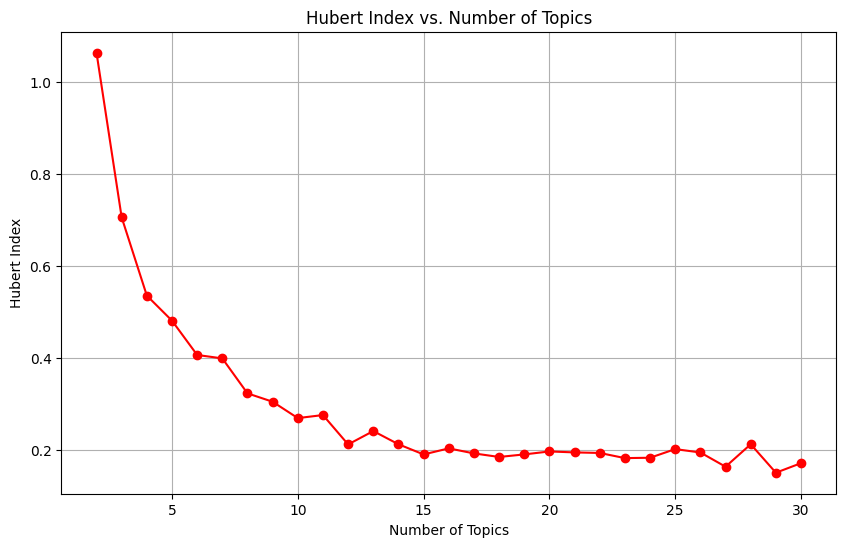

In [ ]:
# Plot Hubert index
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_topics + 1), hubert_index_values, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Topics')
plt.ylabel('Hubert Index')
plt.title('Hubert Index vs. Number of Topics')
plt.grid(True)
plt.show()